In [20]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

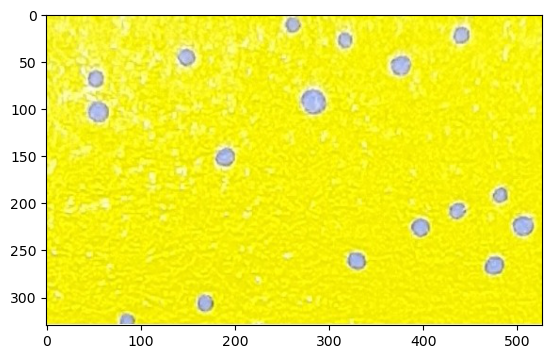

In [3]:
image = plt.imread(r'C:\Users\User\Desktop\Python_projects\Image_processing_project\image_1.jpeg')
plt.imshow(image)

In [4]:
R = image[:, :, 0]
G = image[:, :, 1]
B = image[:, :, 2]

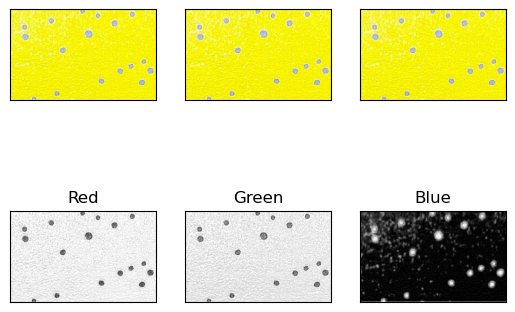

In [5]:
plt.figure(1)


plt.subplot(231)    # 2 rows, 3 columns
plt.imshow(image)
plt.xticks([])      # remove image labels
plt.yticks([])

plt.subplot(232)    # changed last number
plt.imshow(image)
plt.xticks([])      
plt.yticks([])

plt.subplot(233)    
plt.imshow(image)
plt.xticks([])      
plt.yticks([])

plt.subplot(234)    
plt.imshow(R, cmap='gray')
plt.xticks([])      
plt.yticks([])
plt.title('Red')

plt.subplot(235)    
plt.imshow(G, cmap='gray')
plt.xticks([])     
plt.yticks([])
plt.title('Green')

plt.subplot(236)   
plt.imshow(B, cmap='gray')
plt.xticks([])     
plt.yticks([])
plt.title('Blue')


plt.show()

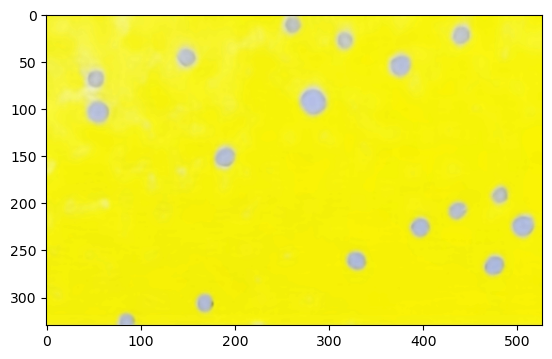

In [6]:
denoised = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)

plt.imshow(denoised)

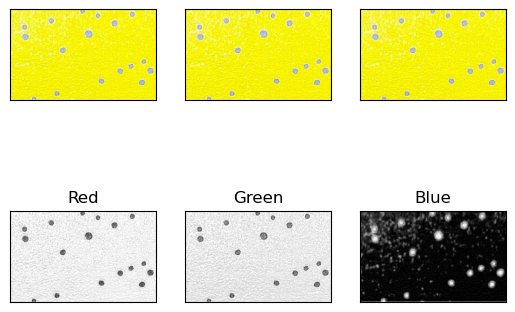

In [7]:
plt.figure(1)


plt.subplot(231)    # 2 rows, 3 columns
plt.imshow(image)
plt.xticks([])      # remove image labels
plt.yticks([])

plt.subplot(232)    # changed last number
plt.imshow(image)
plt.xticks([])      
plt.yticks([])

plt.subplot(233)    
plt.imshow(image)
plt.xticks([])      
plt.yticks([])

plt.subplot(234)    
plt.imshow(R, cmap='gray')
plt.xticks([])      
plt.yticks([])
plt.title('Red')

plt.subplot(235)    
plt.imshow(G, cmap='gray')
plt.xticks([])     
plt.yticks([])
plt.title('Green')

plt.subplot(236)   
plt.imshow(B, cmap='gray')
plt.xticks([])     
plt.yticks([])
plt.title('Blue')


plt.show()

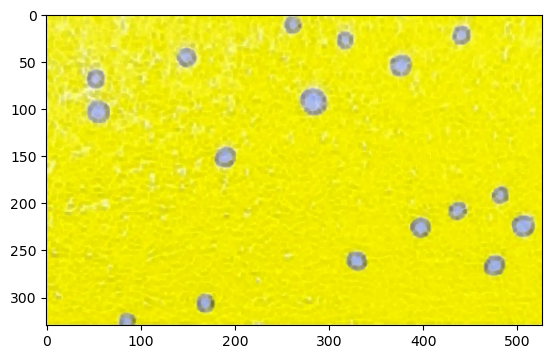

In [8]:
# testing erosion process
kernel = np.ones((3, 3), np.uint8)
erosion = cv2.erode(image, kernel)
plt.imshow(erosion)

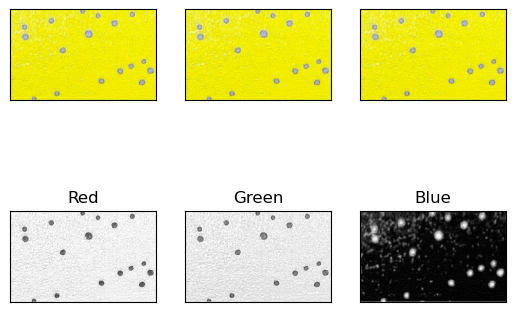

In [9]:
plt.figure(1)


plt.subplot(231)    # 2 rows, 3 columns
plt.imshow(erosion)
plt.xticks([])      # remove image labels
plt.yticks([])

plt.subplot(232)    # create subplot next to the another
plt.imshow(erosion)
plt.xticks([])      
plt.yticks([])

plt.subplot(233)    
plt.imshow(erosion)
plt.xticks([])      
plt.yticks([])

plt.subplot(234)    
plt.imshow(R, cmap='gray')
plt.xticks([])      
plt.yticks([])
plt.title('Red')

plt.subplot(235)    
plt.imshow(G, cmap='gray')
plt.xticks([])     
plt.yticks([])
plt.title('Green')

plt.subplot(236)   
plt.imshow(B, cmap='gray')
plt.xticks([])     
plt.yticks([])
plt.title('Blue')


plt.show()

# Transforming into a binary image

In [63]:
# Read the RGB image
rgb_image = cv2.imread(r'C:\Users\User\Desktop\Python_projects\Image_processing_project\image_1.jpeg')

# split the image into its color channels
b, g, r = cv2.split(rgb_image)

zeros = np.zeros_like(r)

# show only red channel as grayscale 
red_channel = cv2.merge([zeros, zeros, r])
cv2.imshow("Red Channel", red_channel)

green_channel = cv2.merge([zeros, g, zeros])
cv2.imshow("Green Channel", green_channel)

blue_channel = cv2.merge([b, zeros, zeros])
cv2.imshow("Blue Channel", blue_channel)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [64]:
g_im = cv2.cvtColor(rgb_image, cv2.COLOR_BGRA2GRAY)

cv2.imshow("Grayscale Image", g_im)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [65]:
print(g_im)

[[228 220 219 ... 220 225 227]
 [225 221 223 ... 217 222 226]
 [224 223 225 ... 213 219 224]
 ...
 [229 225 225 ... 219 222 223]
 [220 220 219 ... 218 223 226]
 [243 243 243 ... 243 243 243]]


In [66]:
threshold_value = 198  # You can adjust this value as needed

_, binary_mask = cv2.threshold(g_im, threshold_value, 255, cv2.THRESH_BINARY)

# Invert the binary mask to highlight dark gray values
inverted_mask = cv2.bitwise_not(binary_mask)

# Display the binary mask and inverted mask
cv2.imshow("Binary Mask", binary_mask)
cv2.imshow("Inverted Mask", inverted_mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### In the previous step, the image has been transformed into a binary format while preserving the drips. However, it is necessary to enhance the drips before further analysis.

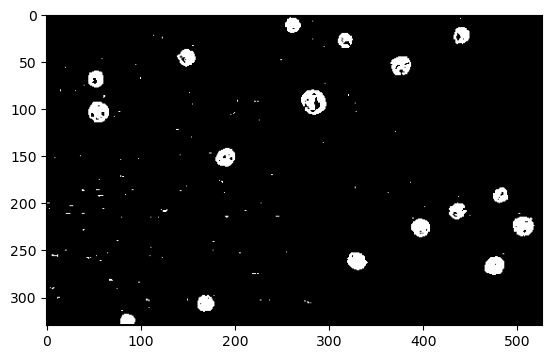

In [67]:
# using inverted_mask to proceed 
plt.imshow(inverted_mask, cmap='gray')

In [68]:
# Define the kernel for dilation
kernel = np.ones((5, 5), np.uint8)  # You can adjust the kernel size as needed

# Perform dilation
dilated_image = cv2.dilate(inverted_mask, kernel, iterations=1)

# Display the original and dilated images
cv2.imshow("Original Binary Image", inverted_mask)
cv2.imshow("Dilated Image", dilated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# try closing operation

In [69]:
# testing possibilities

dilated_image = cv2.dilate(inverted_mask, kernel, iterations=1)

closed_image = cv2.erode(dilated_image, kernel, iterations=2)

cv2.imshow('Original Image', inverted_mask)
cv2.imshow('Dilated Image', dilated_image)
cv2.imshow('Closed Image', closed_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [70]:
# using dilated_image from above and eroding to test results
kernel = np.ones((7, 7), np.uint8)         
eroded_image = cv2.erode(dilated_image, kernel, iterations=1)

cv2.imshow('Original Image', inverted_mask)
cv2.imshow('Eroded Image', eroded_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

# so far, the noise has been eliminated
# dilating image back

In [71]:
new_kernel = np.ones((4,4), np.uint8)
dilated_img = cv2.dilate(eroded_image, new_kernel, iterations=2)

cv2.imshow('Original Image', eroded_image)
cv2.imshow('Dilated Image', dilated_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

print(np.unique(dilated_img))

[  0 255]


#### The variable `dilated_img` is the final version of our processed image so far.
#### It's a binary image so far.
#### Using contour detection to locate and count the circles.

In [72]:
# Define parameters for the Hough Circle Transform
minRadius = 1
maxRadius = 50
param1 = 1  # Gradient threshold for edge detection
param2 = 30  # Accumulator threshold for circle detection

# Use the Hough Circle Transform to detect circles
circles = cv2.HoughCircles(dilated_img, cv2.HOUGH_GRADIENT, dp=1, minDist=20,
                           param1=param1, param2=param2, minRadius=minRadius, maxRadius=maxRadius)

if circles is not None:
    circles = np.uint8(np.around(circles))
    for circle in circles[0, :]:
        # Draw the outer circle
        cv2.circle(binary_image, (circle[0], circle[1]), circle[2], (0, 0, 255), 2)
        # Draw the center of the circle
        cv2.circle(binary_image, (circle[0], circle[1]), 2, (0, 255, 0), 3)

# Display the image with detected circles
cv2.imshow("Circles Detected", dilated_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [73]:
# contour is shown in grayscale
contours, hierarchy = cv2.findContours(dilated_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the binary image for drawing contours
contour_image = dilated_img.copy()

# Draw the detected contours on the image
cv2.drawContours(contour_image, contours, -1, (100, 100, 100), 5)  # You can change the color and thickness as needed

# Display the image with detected contours
cv2.imshow("Contours Detected", contour_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [74]:
# transforming new_img to be a colored image so the contours can be seen clearly
colored_image = cv2.applyColorMap(dilated_img, cv2.COLORMAP_JET)
cv2.drawContours(colored_image, contours, -1, (100, 250, 0), 1)

cv2.imshow("Colored contour", colored_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [80]:
print(contours)

(array([[[ 80, 317]],

       [[ 80, 319]],

       [[ 79, 320]],

       [[ 79, 321]],

       [[ 78, 322]],

       [[ 78, 329]],

       [[ 97, 329]],

       [[ 97, 322]],

       [[ 95, 320]],

       [[ 95, 319]],

       [[ 94, 319]],

       [[ 93, 318]],

       [[ 91, 318]],

       [[ 90, 317]]], dtype=int32), array([[[165, 297]],

       [[163, 299]],

       [[162, 299]],

       [[161, 300]],

       [[161, 302]],

       [[160, 303]],

       [[160, 314]],

       [[163, 317]],

       [[177, 317]],

       [[179, 315]],

       [[179, 314]],

       [[181, 312]],

       [[181, 304]],

       [[179, 302]],

       [[179, 298]],

       [[176, 298]],

       [[175, 297]]], dtype=int32), array([[[476, 256]],

       [[475, 257]],

       [[471, 257]],

       [[466, 262]],

       [[466, 264]],

       [[465, 265]],

       [[465, 275]],

       [[467, 277]],

       [[469, 277]],

       [[470, 278]],

       [[472, 278]],

       [[473, 279]],

       [[480, 279]],

   

In [79]:
print(f'There are {len(contours)} contours in  the image.')

There are 17 contours in  the image.
(array([[[ 80, 317]],

       [[ 80, 319]],

       [[ 79, 320]],

       [[ 79, 321]],

       [[ 78, 322]],

       [[ 78, 329]],

       [[ 97, 329]],

       [[ 97, 322]],

       [[ 95, 320]],

       [[ 95, 319]],

       [[ 94, 319]],

       [[ 93, 318]],

       [[ 91, 318]],

       [[ 90, 317]]], dtype=int32), array([[[165, 297]],

       [[163, 299]],

       [[162, 299]],

       [[161, 300]],

       [[161, 302]],

       [[160, 303]],

       [[160, 314]],

       [[163, 317]],

       [[177, 317]],

       [[179, 315]],

       [[179, 314]],

       [[181, 312]],

       [[181, 304]],

       [[179, 302]],

       [[179, 298]],

       [[176, 298]],

       [[175, 297]]], dtype=int32), array([[[476, 256]],

       [[475, 257]],

       [[471, 257]],

       [[466, 262]],

       [[466, 264]],

       [[465, 265]],

       [[465, 275]],

       [[467, 277]],

       [[469, 277]],

       [[470, 278]],

       [[472, 278]],

       [[4